# Task 1 - Grid Game

In [1]:
# Import libraries
import matplotlib.pyplot as plt
import numpy as np

# Set the seed for the random integer generators
np.random.seed(46853)

In [2]:
# Prompt the player to enter the grid size
grid_width = int(input("Enter the grid width: "))

# Prompt the player to enter the grid size
grid_height = int(input("Enter the grid height: "))

# Prompt the player to enter the distribution parameters
distribution_mean = float(input("Enter the distribution mean: "))
distribution_stddev = float(input("Enter the distribution standard deviation: "))

Enter the grid width: 15
Enter the grid height: 11
Enter the distribution mean: 4
Enter the distribution standard deviation: 5


In [3]:
# Generate a grid with random cell values using a normal distribution based on the user input
# and generate the integers to be between 0 and 9
grid = [[np.around(np.clip(np.random.normal(distribution_mean, distribution_stddev), 0, 9)).astype(int)
         for _ in range(grid_height)] for _ in range(grid_width)]

# Define the start and goal positions
start = (0, 0)
goal = (grid_width - 1, grid_height - 1)

In [4]:
# Simple Heuristic Algorithm - Not used but developed into the Dijkstra algorithm below
def heuristic_algorithm(beginning, end):
    # Create a set to store the visited nodes
    visited_nodes = set()

    # Create a queue for the nodes to visit and add the start node to the queue
    queue = [beginning]

    # Create a dictionary to store the came_from values of the nodes
    came_from_dict = {beginning: None}

    # While the queue is not empty
    while queue:
        # Get the next node in the queue
        current_node = queue.pop(0)

        # If the current node is the goal, return the came_from dictionary
        if current_node == end:
            return came_from_dict

        # Add the current node to the visited set
        visited_nodes.add(current_node)

        # For each neighbour of the current node
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            # Calculate the position of the neighbour
            x_pos, y_pos = current_node
            neighbour = (x_pos + dx, y_pos + dy)

            # If the neighbour is out of bounds or has been visited, skip it
            if not (0 <= x_pos + dx < grid_width) or not (0 <= y_pos + dy < grid_height) or neighbour in visited_nodes:
                continue

            # Set the came_from value of the neighbour to the current node
            came_from_dict[neighbour] = current_node

            # Add the neighbour to the queue
            queue.append(neighbour)

In [7]:
# Dijkstra Algorithm developed from the Heuristic Algorithm
def dijkstra(beginning, end):
    # Create a set to store the visited nodes
    visited_nodes = set()

    # Create a min-priority queue for the nodes to visit and add the start node to the queue with a priority of 0
    queue = [(0, beginning)]

    # Create a dictionary to store the costs of the nodes
    cost_dict = {beginning: 0}

    # Create a dictionary to store the came_from values of the nodes
    came_from_dict = {beginning: None}

    # While the queue is not empty
    while queue:
        # Sort the queue in ascending order by cost
        queue.sort(key=lambda x_sort: x_sort[0])

        # Get the node with the lowest priority
        cost, current_node = queue.pop(0)

        # If the current node is the goal, return the came_from dictionary
        if current_node == end:
            return came_from_dict

        # Add the current node to the visited set
        visited_nodes.add(current_node)

        # For each neighbour of the current node
        for dx, dy in [(1, 0), (-1, 0), (0, 1), (0, -1)]:
            # Calculate the position of the neighbour
            x_pos, y_pos = current_node
            neighbour = (x_pos + dx, y_pos + dy)

            # If the neighbour is out of bounds or has been visited, skip it
            if not (0 <= x_pos + dx < grid_width) or not (0 <= y_pos + dy < grid_height) or neighbour in visited_nodes:
                continue

            # Calculate the cost to reach the neighbour
            cost = cost_dict[current_node] + grid[x_pos][y_pos]

            # If the cost is lower than the current cost of the neighbour
            if cost < cost_dict.get(neighbour, float('inf')):
                # Update the cost of the neighbour
                cost_dict[neighbour] = cost

                # Add the neighbour to the queue with the calculated cost
                queue.append((cost, neighbour))

                # Set the came_from value of the neighbour to the current node
                came_from_dict[neighbour] = current_node

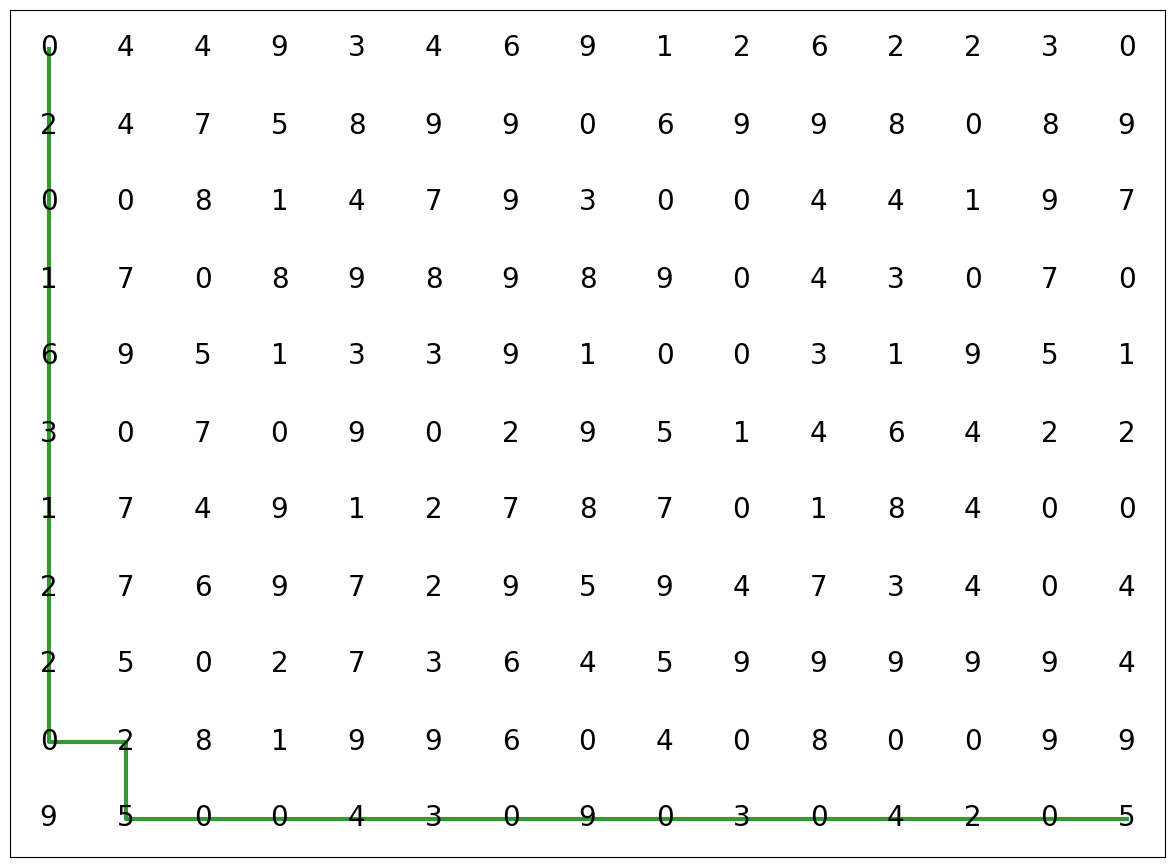

In [11]:
# Find the shortest path using Dijkstra's algorithm
came_from = dijkstra(start, goal)

# Create a figure with a specified size
fig = plt.figure(figsize=(grid_width, grid_height))

# Rotate the grid to correct the position of the grid
grid = np.rot90(grid, k=-1)

# Display the grid as an image with no shading
plt.imshow(grid, cmap=None, alpha=0)

# Rotate the grid back to correct the position of the path
grid = np.rot90(grid)

# Display the numbers in the center of each grid square
for i in range(grid_width):
    for j in range(grid_height):
        plt.text(i, j, grid[i][j], ha="center", va="center", color="black", fontsize=20)

# Reconstruct the path from the came_from dictionary
path = []
current = goal
while current != start:
    path.append(current)
    current = came_from[current]
path.append(start)

# Get the coordinates of the points on the path
x, y = zip(*path)

# Draw the path on the grid
plt.plot(x, y, c="green", linewidth=3, alpha=0.8)

# Turn off the x-axis tick marks and labels
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)

# Turn off the y-axis tick marks and labels
plt.tick_params(axis='y', which='both', left=False, right=False, labelleft=False)

# Show the plot
plt.show()